<a href="https://colab.research.google.com/github/Jgabriel1800/PIB-no-brasil/blob/main/PIBbrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [57]:
import pandas as pd

In [58]:
df_pib=pd.read_csv('https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv')
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [59]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


**Como está disposto o PIB nos estados brasileiros no ano de 2020**

In [60]:
df_pib_2020=df_pib.copy()
df_pib_2020=df_pib_2020.query('ano==2020').set_index('sigla_uf').sort_values('pib',ascending=False)[['pib']]
df_pib_2020.head()

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


gerando gráfico

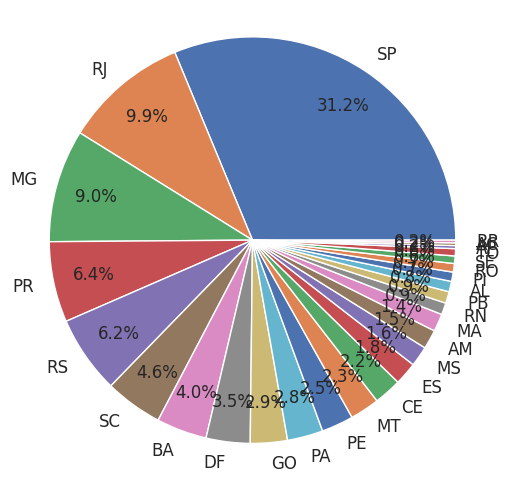

In [61]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(6,6))

ax.pie(data=df_pib_2020,x='pib',labels=df_pib_2020.index,autopct='%.1f%%',radius=1.1,pctdistance=0.8,textprops={'size':12})
plt.show()

Tratando os dados para obter a visualização

In [62]:
df_pib_2002=df_pib.query('ano==2002')[['regiao','pib']]
df_pib_2020=df_pib.query('ano==2020')[['regiao','pib']]

df_pib_2002=df_pib_2002.groupby('regiao').sum().sort_values('pib',ascending=False)
df_pib_2020=df_pib_2020.groupby('regiao').sum().sort_values('pib',ascending=False)

display(df_pib_2002,df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


Gerando gráfico

Text(-50, 295, '\n\n')

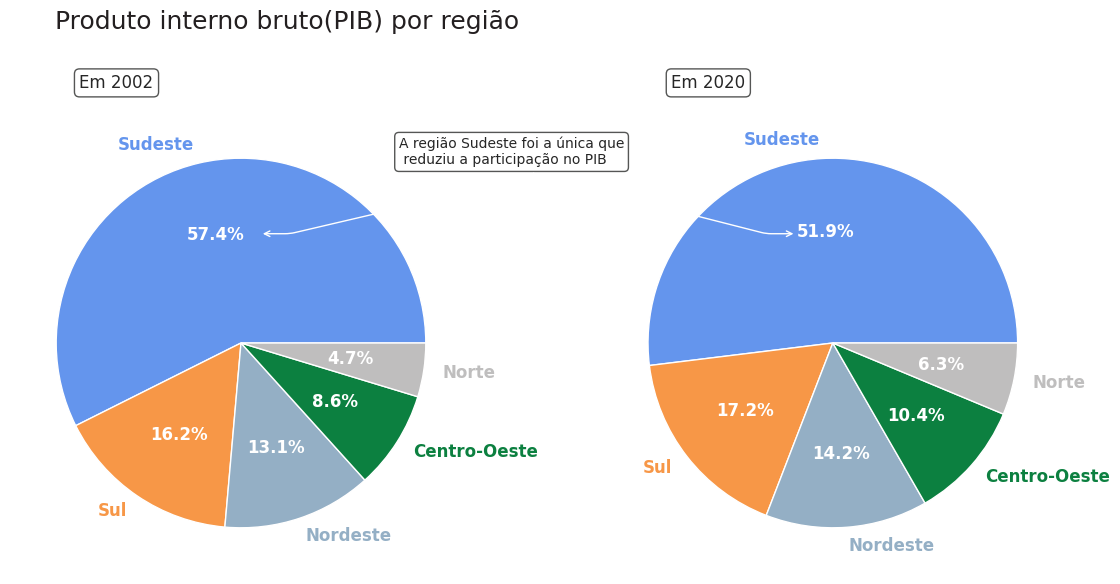

In [63]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,2,figsize=(14,6))

cores=[AZUL3,LARANJA1,AZUL5,VERDE1,CINZA5]

plt.suptitle('Produto interno bruto(PIB) por região',fontsize=18,color=CINZA1,ha='right',x=0.5,y=1.05)

ptc,text,_=axs[0].pie(data=df_pib_2002,x='pib',labels=df_pib_2002.index,autopct='%.1f%%',pctdistance=0.6,
                      textprops={'size':12,'fontweight':'bold','color':BRANCO},colors=cores)

axs[0].annotate('Em 2002',xy=(50,350),size=12,xycoords='axes points',bbox=dict(boxstyle='round',fc=BRANCO,ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

ptc,text,_=axs[1].pie(data=df_pib_2020,x='pib',labels=df_pib_2020.index,autopct='%.1f%%',pctdistance=0.6,
                      textprops={'size':12,'fontweight':'bold','color':BRANCO},colors=cores)
axs[1].annotate('Em 2020',xy=(50,350),size=12,xycoords='axes points',bbox=dict(boxstyle='round',fc=BRANCO,ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


axs[0].annotate('A região Sudeste foi a única que\n reduziu a participação no PIB',xy=(180,245),xycoords='axes points',xytext=(280,295),textcoords='axes points'
,bbox=dict(boxstyle='round',fc=BRANCO,ec=CINZA3),size=10,arrowprops=dict(arrowstyle='->',fc=CINZA1,connectionstyle='arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5'))

axs[1].annotate('\n\n',xy=(140,245),xycoords='axes points',xytext=(-50,295),textcoords='axes points',
size=10,arrowprops=dict(arrowstyle='->',fc=CINZA1,connectionstyle='arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5'))

Qual participação do estado de Minas Gerais no PIB de todo o Brasil no ano de 2020

In [64]:
df_mg_2020=df_pib.query('ano==2020')[['sigla_uf','pib']]
df_mg_2020.loc[df_mg_2020['sigla_uf']=='MG','sigla_uf']='Minas Gerais'
df_mg_2020.loc[df_mg_2020['sigla_uf']!='Minas Gerais','sigla_uf']='Outros'

df_mg_2020=df_mg_2020.groupby('sigla_uf').sum()
df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


Gerando o gráfico

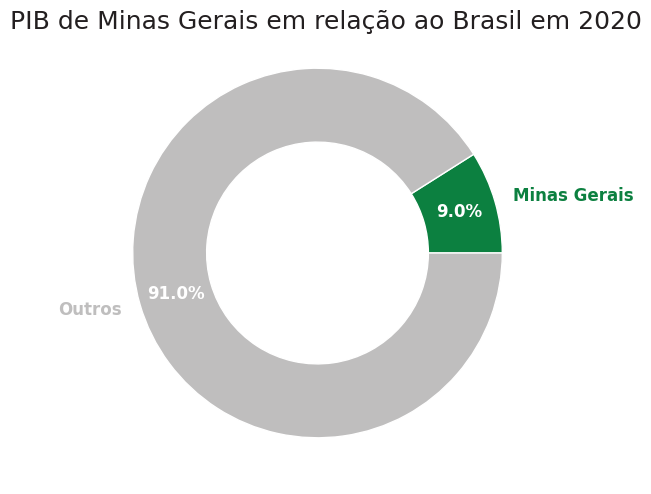

In [65]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(6,6))
cores=[VERDE1,CINZA5]

plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020',fontsize=18,color=CINZA1,ha='left',x=0,y=0.9)

ptc,text, _ =ax.pie(data=df_mg_2020,x='pib',labels=df_mg_2020.index,autopct='%.1f%%',
                  startangle=0,pctdistance=0.8,wedgeprops=dict(width=0.4),textprops=dict(size=12,fontweight='bold',color=BRANCO),colors=cores)

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

Como está distribuido o PIB do estado da Bahia em 2020 separado por impostios líquidos e valores adicionados brutos dos bens e serviços produzidos

Tratando os dados

In [66]:
bahia=df_pib.query('sigla_uf=="BA" and ano ==2020')[['pib','impostos_liquidos','va']]
bahia.rename(columns={'pib':'PIB','impostos_liquidos':'Impostos Liquidos','va':'Valor Adicionado Bruto'},inplace=True)
bahia

,PIB,Impostos Liquidos,Valor Adicionado Bruto
303,305320812691,37094030606,268226782074


In [67]:
bahia=bahia.melt(var_name='Indicadores',value_name='Valores')
bahia

,Indicadores,Valores
0,PIB,305320812691
1,Impostos Liquidos,37094030606
2,Valor Adicionado Bruto,268226782074


In [68]:
bahia.loc[bahia['Indicadores']=='Impostos Liquidos','Valores']=bahia['Valores']*-1

bahia['Valores_str']=(bahia['Valores']/1e9).map('R${:,.2f} Bi'.format)

bahia['Medidas']=['absolute','relative','total']
bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$305.32 Bi,absolute
1,Impostos Liquidos,-37094030606,R$-37.09 Bi,relative
2,Valor Adicionado Bruto,268226782074,R$268.23 Bi,total


Gerando gráfico

In [69]:
import plotly.graph_objects as go

fig= go.Figure(go.Waterfall(name='',orientation='v',measure=bahia['Medidas'],
               x=bahia['Indicadores'],y=bahia['Valores'],text=bahia['Valores_str'],
               textposition='outside',connector_line=dict(color=CINZA3),totals_marker=dict(color=AZUL3),
                decreasing_marker=dict(color=VERMELHO1)))
fig.update_layout(width=1080,height=500,font_family='DejaVu Sans',font_size=15,
                  font_color=CINZA2,title_font_color=CINZA1,title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto(PIB) da Bahia em 2020'+
                  '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores'+
                  'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l=50,plot_bgcolor=BRANCO,yaxis_range=[0,380e9],hovermode='closest')

fig.update_yaxes(showticklabels=False)
fig.update_traces(hovertemplate='<b>%{x}</b>=%{text}')
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto |IBGE</a>',
                   align='left',xref='paper',yref='paper',x=1,y=-0.2,showarrow=False)
fig.show()

Evolução do PIB do Rio de Janeiro de 2010 a 2020

In [70]:
anos=[x for x in range(2010,2021)]
rio=df_pib.query('sigla_uf=="RJ" and ano==@anos')[['ano','pib']]
rio=rio.reset_index(drop=True)
rio

,ano,pib
0,2010,449858101109
1,2011,512767904769
2,2012,574884973130
3,2013,628226069362
4,2014,671076844311
5,2015,659138951833
6,2016,640401206447
7,2017,671605668055
8,2018,758859046865
9,2019,779927917084


In [71]:
rio['variacao_pib']=rio['pib'].diff().fillna(rio['pib']).astype('int64')
rio['Medidas']=['absolute']+['Relative']*10

rio.head()

,ano,pib,variacao_pib,Medidas
0,2010,449858101109,449858101109,absolute
1,2011,512767904769,62909803660,Relative
2,2012,574884973130,62117068361,Relative
3,2013,628226069362,53341096232,Relative
4,2014,671076844311,42850774949,Relative


In [72]:
atualizacao=pd.Series({'ano':'Total','pib':rio['pib'].values[-1],
                       'variacao_pib':rio['pib'].values[-1],'Medidas':'total'}).to_frame().T

rio=pd.concat([rio,atualizacao],axis=0,ignore_index=True)
rio=rio.drop(columns=['pib'])

rio['variacao_pib_texto']=(rio['variacao_pib']/1e9).map('R${:,.2f}Bi'.format)
rio.rename(columns={'ano':'Ano','variacao_pib':'Variação do PIB','variacao_pib_texto':'Variação do PIB(em texto)'},inplace=True)
rio

,Ano,Variação do PIB,Medidas,Variação do PIB(em texto)
0,2010,449858101109,absolute,R$449.86Bi
1,2011,62909803660,Relative,R$62.91Bi
2,2012,62117068361,Relative,R$62.12Bi
3,2013,53341096232,Relative,R$53.34Bi
4,2014,42850774949,Relative,R$42.85Bi
5,2015,-11937892478,Relative,R$-11.94Bi
6,2016,-18737745386,Relative,R$-18.74Bi
7,2017,31204461608,Relative,R$31.20Bi
8,2018,87253378810,Relative,R$87.25Bi
9,2019,21068870219,Relative,R$21.07Bi


Criando o gráfico

In [73]:
import plotly.graph_objects as go
import numpy as np

fig=go.Figure(go.Waterfall(name='',orientation='v',measure=rio['Medidas'],
                           y=rio['Variação do PIB'],text=rio['Variação do PIB(em texto)'],
                           textposition='outside',connector_line=dict(color=CINZA3),totals_marker=dict(color=AZUL3),
                           increasing_marker=dict(color=VERDE1),
                           decreasing_marker=dict(color=VERMELHO1)))

fig.update_layout(width=1300,height=600,font_family='DejaVu Sans',font_size=15,
                  font_color=CINZA2,title_font_color=CINZA1,title_font_size=24,
                  title_text='Variação do Produto Interno Bruto(PIB) do Rio de Janeiro'+
                  '<br><sup size=1 style="color:#555655"> De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor=BRANCO, yaxis_range=[0,850e9])

fig.update_yaxes(showticklabels=False)
fig.update_xaxes(tickmode='array',tickvals=np.arange(0,12),ticktext=rio['Ano'])

fig.update_traces(hovertemplate='<b>%{x}</b>=%{text}')

fig.add_annotation(text='O <b>Rio de Janeiro</b> apresentou recuo no PIB <br> em pelo menos 3 anos no preíodo: <br> 2015,2016 e 2020',
                   align='left',axref='x',ayref='y',x=5,y=600e9,ax=8,ay=450e9,
                   arrowhead=1,arrowside='start',showarrow=True,arrowwidth=2,arrowcolor=CINZA3,
                   bordercolor=CINZA3,borderwidth=1,borderpad=4)

fig.add_annotation(text='',axref='x',ayref='y',x=6,y=600e9,ax=8,ay=530e9,
                   arrowhead=1,arrowside='start',showarrow=True,arrowwidth=2,arrowcolor=CINZA3)

fig.add_annotation(text='',axref='x',ayref='y',x=10,y=710e9,ax=8.5,ay=530e9,
                   arrowhead=1,arrowside='start',showarrow=True,arrowwidth=2,arrowcolor=CINZA3)

fig.show()

O PIB dos últimos 3 quinquênios na região sul do Brasil dividido pelos estados

Um df com valores absolutos

In [74]:
anos=[x for x in range(2010,2021,5)]

pib_sul=df_pib.query("regiao=='Sul' and ano ==@anos")[['ano','sigla_uf','pib']]
pib_sul['pib']=(pib_sul['pib']/1e9).round(2)
pib_sul=pib_sul.reset_index(drop=True)
pib_sul

,ano,sigla_uf,pib
0,2010,PR,225.21
1,2015,PR,376.96
2,2020,PR,487.93
3,2010,SC,153.73
4,2015,SC,249.08
5,2020,SC,349.28
6,2010,RS,241.25
7,2015,RS,381.99
8,2020,RS,470.94


df com valores relativos

In [75]:
pib_sul_cross=pd.crosstab(index=pib_sul.ano,columns=pib_sul.sigla_uf,aggfunc='sum',values=pib_sul.pib,normalize='index')
pib_sul_cross=pib_sul_cross.reset_index()
pib_sul_cross

sigla_uf,ano,PR,RS,SC
0,2010,0.363131,0.388994,0.247876
1,2015,0.373957,0.378947,0.247096
2,2020,0.372992,0.360005,0.267003


Gerando gráfico

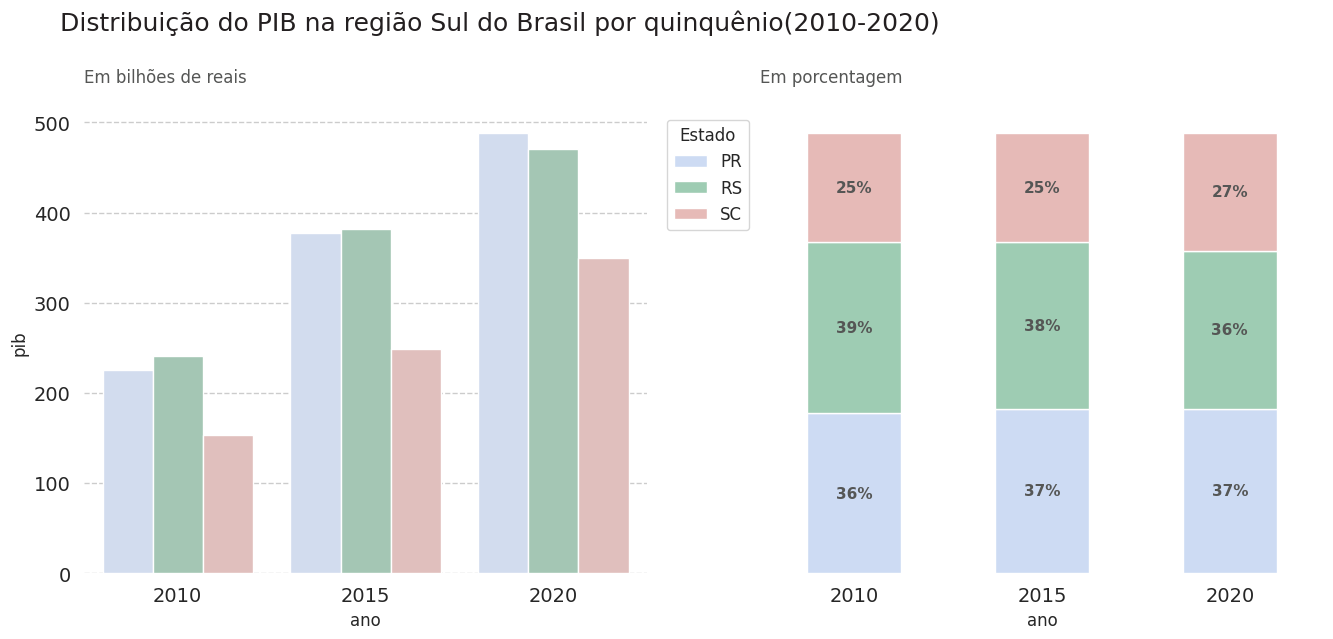

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs= plt.subplots(1,2,figsize=(16,6))
sns.set_theme(style='white')

cores=[AZUL6,VERDE3,VERMELHO2]

fig.suptitle('Distribuição do PIB na região Sul do Brasil por quinquênio(2010-2020)',
             fontsize=18,color=CINZA1,ha='right',x=0.66,y=1.05)

sns.barplot(data=pib_sul,x='ano',y='pib',hue='sigla_uf',hue_order=['PR','RS','SC'],
            ax=axs[0],palette=cores)
axs[0].set_title('Em bilhões de reais\n',color=CINZA3,loc='left')
axs[0].set_xlabel=('')
axs[0].set_ylabel=('')
axs[0].xaxis.set_tick_params(labelsize=14,color=CINZA2)
axs[0].yaxis.set_tick_params(labelsize=14,color=CINZA2)
axs[0].set_frame_on(False)
axs[0].legend().remove()
axs[0].yaxis.grid(linestyle= '--',linewidth=1)


pib_sul_cross.plot(x='ano',kind='bar',stacked=True,color=cores,ax=axs[1])
axs[1].set_title('Em porcentagem\n',color=CINZA3,loc='left')
axs[1].set_xlabel=('')
axs[1].set_ylabel=('')
axs[1].set_yticklabels([])
axs[1].xaxis.set_tick_params(labelsize=14,color=CINZA2,labelrotation=0)
axs[1].set_frame_on(False)
axs[1].legend(bbox_to_anchor=(-0.005,1),title='Estado',title_fontsize=12,fontsize=12)

for container in axs[1].containers:
  labels=[f'{valor.get_height()*100:.0f}%' for valor in container]
  axs[1].bar_label(container,label_type='center',labels=labels,size=11,color=CINZA3,fontweight='bold')

Distribuição em porcentagem dos valores adicionados de bens e serviços descritos na base de dados em relação a cada região em 2020

Tratando os dados

In [77]:
df_va_separado=df_pib.query("ano==2020")[['regiao','va_servicos','va_industria','va_adespss','va_agropecuaria']]
df_va_separado=df_va_separado.reset_index(drop=True)
df_va_separado.head()

,regiao,va_servicos,va_industria,va_adespss,va_agropecuaria
0,Norte,19060688172,8285675423,12000339417,6891411669
1,Norte,6590543336,1191345379,6031050521,983531817
2,Norte,34795836262,35839810630,20210620577,5114449144
3,Norte,5278754961,1706511471,6538065265,1000907462
4,Norte,56395092425,84173852308,37614037902,19730656823


In [78]:
df_va_separado=df_va_separado.groupby('regiao').sum()

#normalizando
df_va_separado=df_va_separado.div(df_va_separado.sum(axis=1),axis=0)
df_va_separado=df_va_separado.sort_values(by='va_servicos',axis=0,ascending=True)
df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


Gerando o gráfico

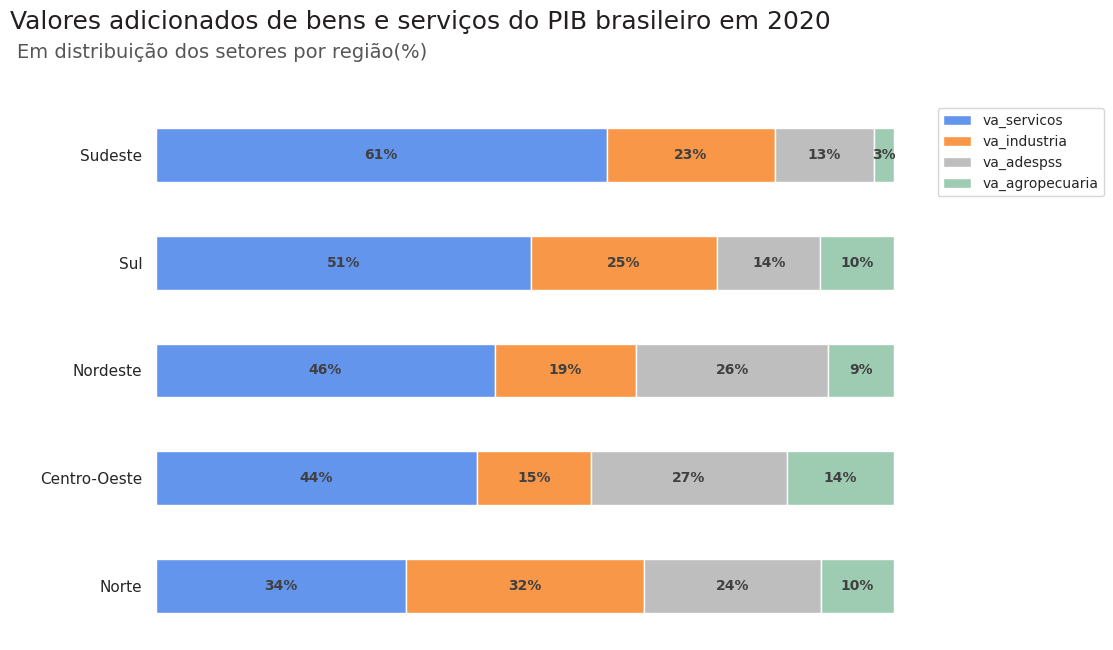

In [88]:
def grafico_va():
  import matplotlib.pyplot as plt
  fig,ax = plt.subplots(figsize=(10,7))

  cores=[AZUL3,LARANJA1,CINZA5,VERDE3]

  df_va_separado.plot(kind='barh',stacked=True,color=cores,ax=ax)
  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020',size=18,color=CINZA1,
               ha='right',x=0.8,y=1.01)
  plt.title('Em distribuição dos setores por região(%)\n',fontsize=14,color=CINZA3,pad=15,
            ha='right',x=0.35)
  ax.legend(bbox_to_anchor=(1,1),bbox_transform=ax.transAxes,fontsize=10,loc='upper left')
  ax.set_xticklabels([])
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14,color=CINZA2)
  ax.set_frame_on(False)

  for container in ax.containers:
    labels=[f'{valor.get_width()*100:.0f}%' for valor in container]
    ax.bar_label(container,label_type='center',labels=labels,size=10,color=CINZA2,
                 fontweight='bold')

  return ax,cores
ax,cores=grafico_va()

Escrita de texto usando diferentes cores

In [89]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    canvas.draw()
    renderer = canvas.get_renderer()

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(renderer)
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


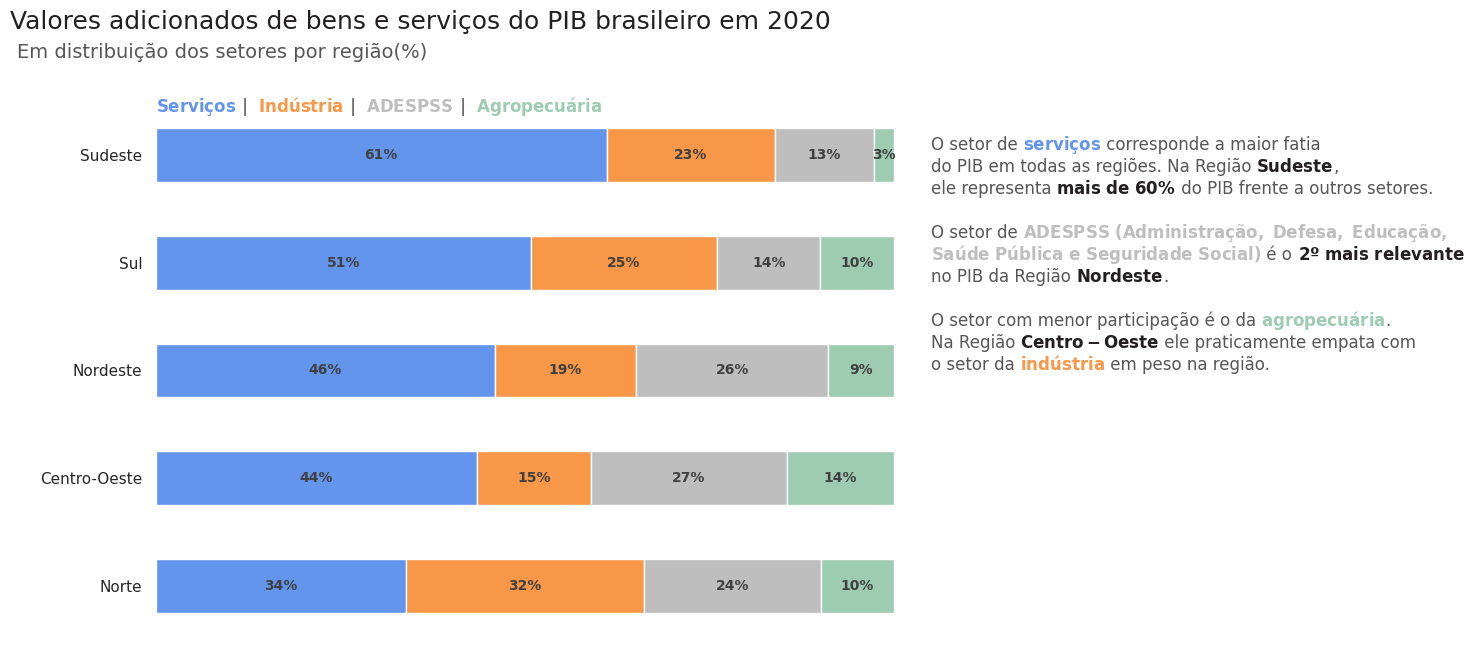

In [99]:
ax, cores = grafico_va()

ax.legend().remove()

cores_texto = [[cores[0],CINZA2,  cores[1],CINZA2, cores[2],CINZA2,  cores[3]]]

texto_colorido(
    0, 4.4,
    '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
    cores=cores_texto,
    ax=ax, fontsize=12
)

texto_colorido(1.05,2,'O setor de ||$\\bf{serviços}$|| corresponde a maior fatia\n'
     'do PIB em todas as regiões. Na Região ||$\\bf{Sudeste}$||,\n'
     'ele representa ||$\\bf{mais\ de\ 60\%}$|| do PIB frente a outros setores.\n'
    '\n'
     'O setor de ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
     '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| é o ||$\\bf{2º\ mais\ relevante}$||\n'
     'no PIB da Região ||$\\bf{Nordeste}$||.\n'
     '\n'
     'O setor com menor participação é o da ||$\\bf{agropecuária}$||.\n'
     'Na Região ||$\\bf{Centro-Oeste}$|| ele praticamente empata com\n'
     'o setor da ||$\\bf{indústria}$|| em peso na região.',
 [    [CINZA3, AZUL3, CINZA3],
      [CINZA3, CINZA1, CINZA3],
      [CINZA3, CINZA1, CINZA3],
      [CINZA3],
      [CINZA3, CINZA5],
      [CINZA5, CINZA3, CINZA1],
      [CINZA3, CINZA1, CINZA3],
      [CINZA3],
      [CINZA3, VERDE3, CINZA3],
      [CINZA3, CINZA1, CINZA3],
      [CINZA3, LARANJA1, CINZA3]
     ],esp=22,ax=ax,fontsize=12)


